# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [ ]:
# como eu vou verificar se a média de um grupo é maior que a média de outro grupo, acredito que o teste tenha que ser á direita
# E caso a gente queria verificar se algo é diferente em qualquer direção podemos fazer uma analise bicaudal

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [5]:
media_A = np.mean(amostra_estrategia_A)
desvio_A = np.var(amostra_estrategia_A)

media_B = np.mean(amostra_estrategia_B)
desvio_B = np.var(amostra_estrategia_B)

print("Média da A:", media_A)
print("Desvio padrão A:", desvio_A)

print("Média da B:", media_B)
print("Desvio padrão B:", desvio_B)

Média da A: 71.40559272313098
Desvio padrão A: 126.68018446943104
Média da B: 74.74868110507046
Desvio padrão B: 108.26062024217782


In [ ]:
# Vejo que a média da B é mais alta, com um desvio padrão mais baixo, ou seja, 
# as notas da Estratégia B são mais concentradas em torno da média, 
# o que indica que a performance dos alunos é mais consistente.
# Se a ideia for ter uma nota mais consistente e com menos variação, 
# a Estratégia B é o ideal.

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [7]:
z_statistic, p_value = stats.ttest_ind(amostra_estrategia_A, amostra_estrategia_B)

print("Estatísticas de teste (z_statistic):", z_statistic)
print("Valor (p_value)", p_value)

nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Rejeitamos a hipótese nula")
else:
    print("Não temos evidências suficientes para rejeitar a hipótese nula")

Estatísticas de teste (z_statistic): -1.5267455833477102
Valor (p_value) 0.13004538960951503
Não temos evidências suficientes para rejeitar a hipótese nula


In [ ]:
# Bom, já fica claro que não podemos rejeitar a hipótese nula.
# pelo fato da média decair para -1,5 e o valor p_value é 13%, fica claro que não temos evidências suficientes para rejeitar a hipótese nula

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

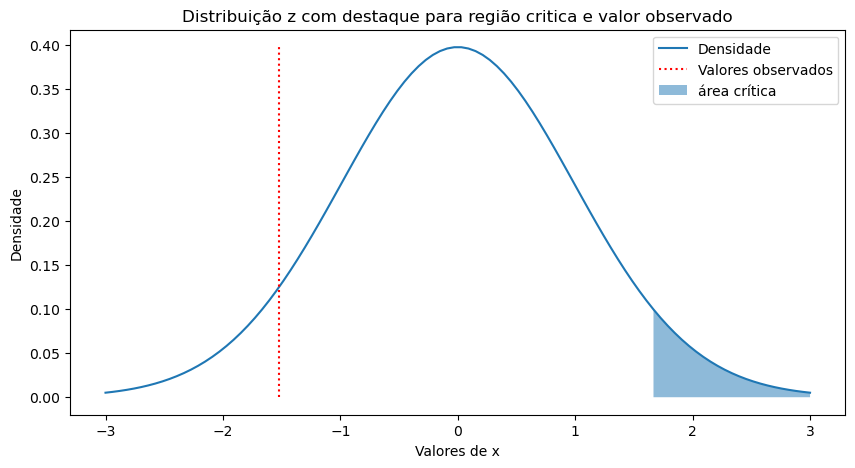

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
mu = 0
variance = 1
sigma = variance**.5

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.t.pdf(x, len(amostra_estrategia_A) + len(amostra_estrategia_B) -2)

low = stats.t.ppf(.95, len(amostra_estrategia_A) + len(amostra_estrategia_B) -2)
high = np.inf

ax.plot(x, y, label="Densidade")
ax.vlines(x=[z_statistic], ymin=0, ymax=y.max(), color="r", linestyles="dotted", label="Valores observados")
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5, label="área crítica")

plt.legend()
plt.xlabel("Valores de x")
plt.ylabel("Densidade")
plt.title("Distribuição z com destaque para região critica e valor observado")
plt.show()

In [ ]:
# O valor observado está entre -2 e -1, e está fora da área crítica.
# Isso significa que o resultado observado não é suficientemente extremo para rejeitar a hipótese nula. 
# Portanto, com base nesse gráfico, podemos concluir que não há evidências suficientes para afirmar que existe uma diferença significativa entre as amostras.
# Ou seja, não rejeitamos a hipótese nula."